# Assignment: Unsupervised Machine Learning \ Clustering

## Part 1: Partitional Clustering

In this assignment you will experience with partitional & mixture model clustering. The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

In [187]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Read blood test results as an EMR from an Excel file

In [68]:
# Open the file
xlsx = pd.ExcelFile('EMR-Blood.xlsx')

# Get the first sheet as an object
sheet1 = xlsx.parse(0)

# Set the Key column as the index
sheet1.set_index("Key", inplace=True)

# Show first 10 rows
sheet1[:10]

,Na,K,ALT,AST,WBC,RBC,Hgb,Hct
Key,,,,,,,,
1,141,4.65,31.92,35.01,10.25,4.06,17.6,36.3
2,140,4.96,36.41,16.70,6.13,3.80,13.2,35.6
3,136,3.66,41.43,13.17,5.86,4.26,16.2,43.7
4,136,4.74,23.92,30.33,10.80,4.83,16.1,49.8
5,140,4.74,43.66,20.44,6.59,4.05,12.6,39.1
6,146,3.98,48.41,33.22,4.53,4.04,17.9,47.3
7,144,5.29,44.29,19.28,10.12,3.96,17.2,47.9
8,138,4.57,50.43,16.39,4.66,4.91,13.7,41.5
9,144,3.96,31.51,34.87,4.57,4.72,15.1,47.6


### Blood Test Abbreviations
- Na == Sodium
- K == Potassium
- ALT == Alanine transaminase
- AST == Aspartate transaminase
- WBC == White blood cells
- RBC == Red blood cells
- Hgb == Hemoglobin
- Hct == Hematocrit

### Use K-Means to create clusters according to variables of uniform distribution

In [69]:
# Retrieve the K, WBC and Hgb column values from the dataset to cluster
variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values
EMR3d1
y_pred_KMeans1 = KMeans(n_clusters=5, random_state=0).fit_predict(EMR3d1)
# Run the K-Means algorithm, assuming the correct number of clusters is 5
# y_pred_KMeans1 = KMeans(n_clusters=5, random_state=0).fit(EMR3d1)

### Make a 3D chart

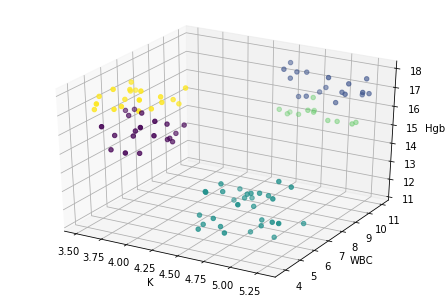

In [70]:
def make_chart (chart_data, y_pred, labels, fig = None, k = None):
    if k is None:
        k = 1
    if fig is None:
        fig = plt.figure()
        ax = Axes3D(fig)
    else:
        ax = fig.add_subplot("33" + str(k), projection='3d')
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

## Challenge 211

Humans can clearly spot 3 clusters, however, for machines it's much harder to "learn" that. In the above implementation, K-Means was given the value of 5 as K.
Your mission, should you choose to accept it, is to develop a **generic** mechanism for finding the most reasonable number of clusters by:
1. Iterating K over a reasonable range, which should be derived from the number of points
2. Harnessing one of the segmentation algorithms we learned as a heuristic to choose K
3. Showing the final clusters in a 3D chart

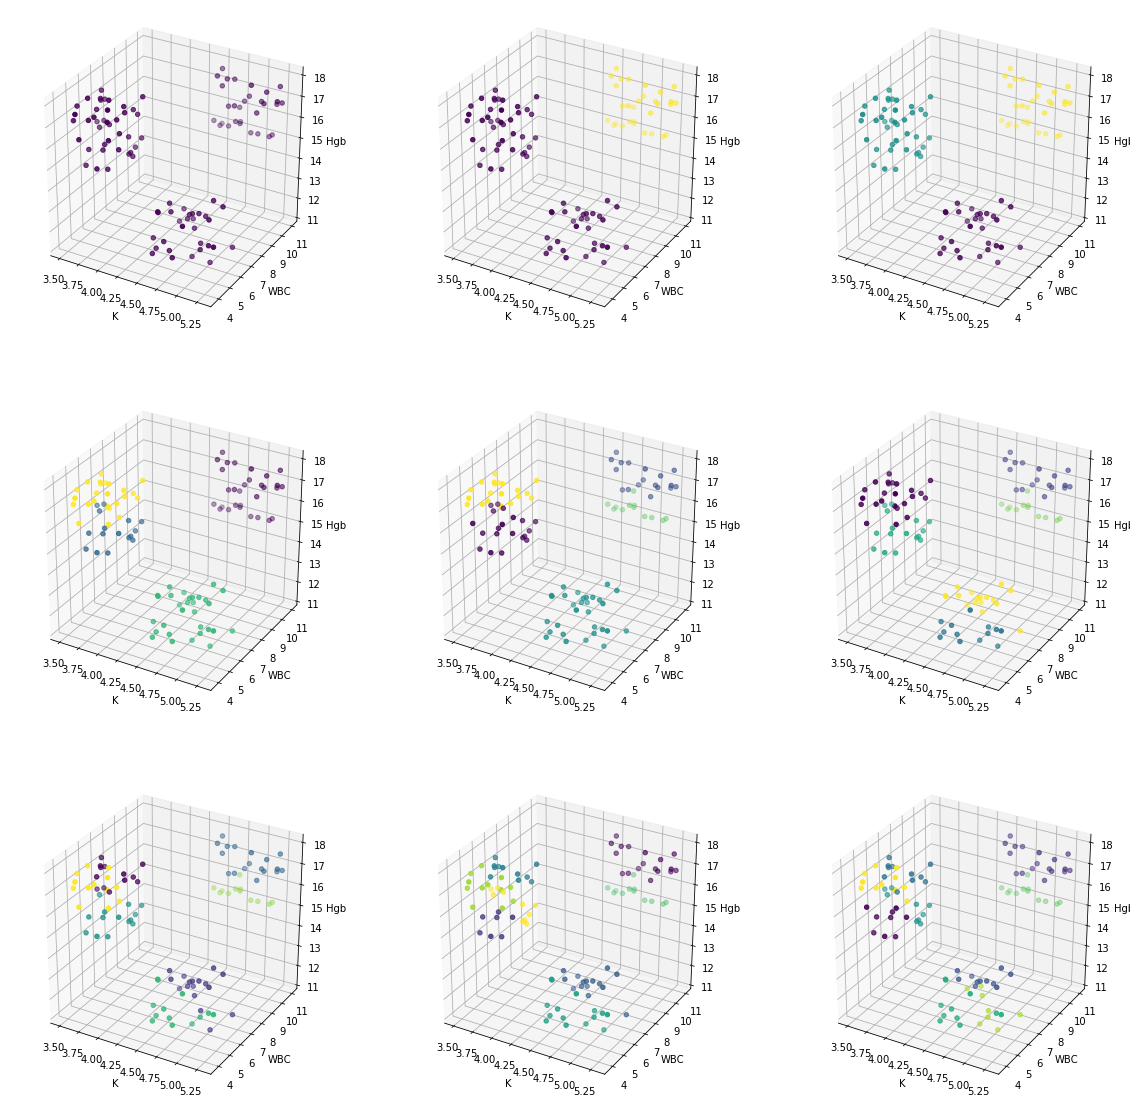

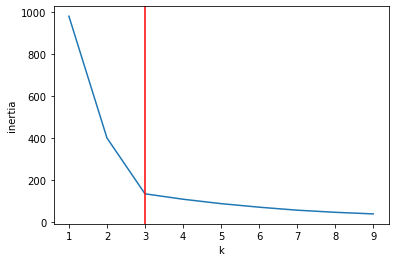

optimal k is  3


In [71]:
fig = plt.figure(0, figsize = (20,20))

sd = []
max_k = int(np.sqrt(len(EMR3d1)))
ks = range(1, max_k)
for k in ks:
    km = KMeans(n_clusters=k, random_state=0).fit(EMR3d1)
    y_pred_with_k = km.predict(EMR3d1)
    sd += [km.inertia_]
    make_chart(EMR3d1, y_pred_with_k, variables1, fig, k)

fig2 = plt.figure(1)
ax = fig2.add_subplot(111)

ax.plot(ks, sd)
plt.xlabel('k')
plt.ylabel('inertia')
f = np.array(sd, dtype=float)
grad = np.gradient(f)
rolled = np.roll(grad, 1)
rolled[0] = 0
plt.axvline(x=ks[np.argmax(grad - rolled)], color='red')
plt.show()
print('optimal k is ',ks[np.argmax(grad - rolled)])


### Silhouette analysis

Use graphic visualization of the Silhouette score to support your above answer:

Avg  0.5738344190137955
Avg  0.644343998493909
Avg  0.5277820110145767
Avg  0.4729315178129309
Avg  0.42733782203468273
Avg  0.42274719727196625
Avg  0.44968456471925156
Avg  0.44410401963150375


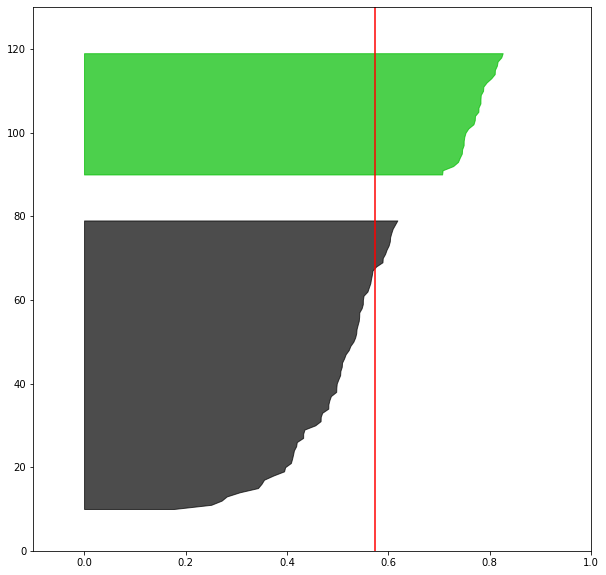

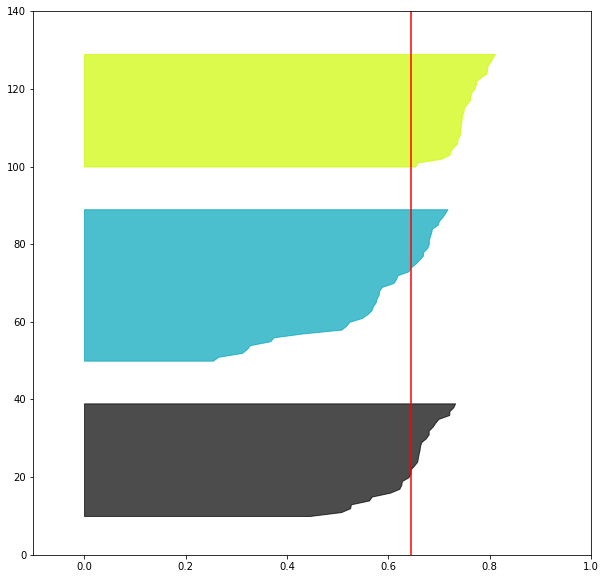

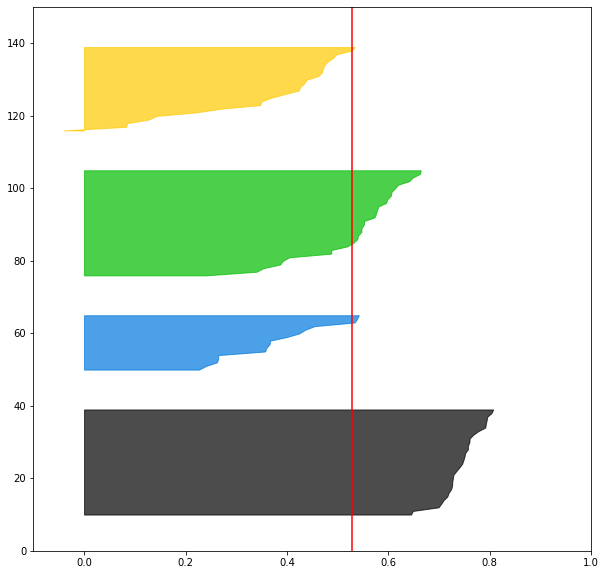

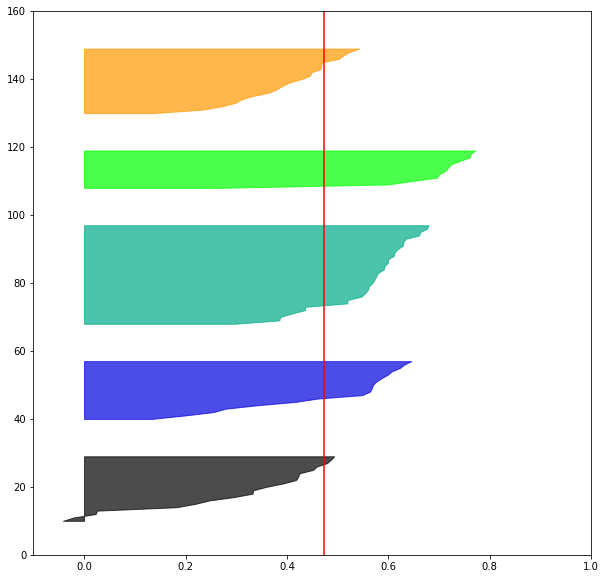

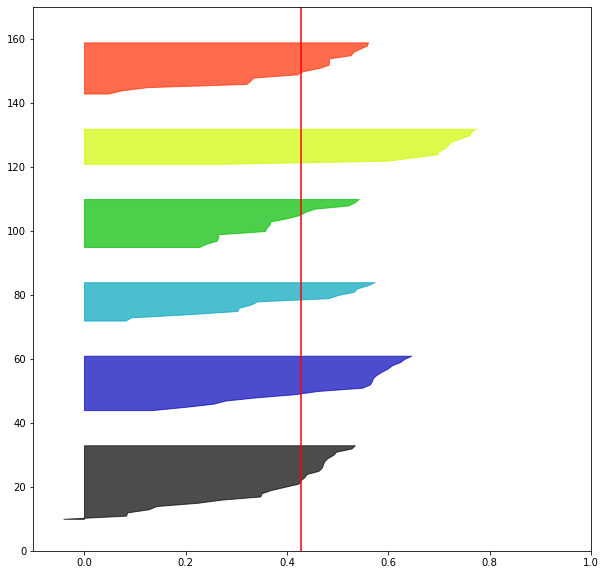

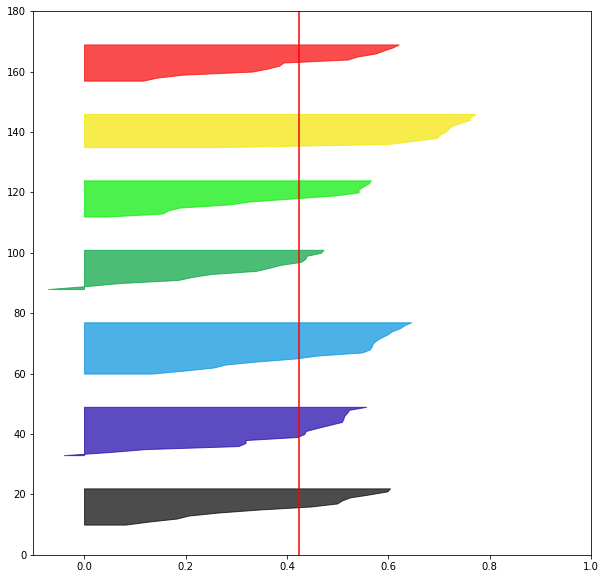

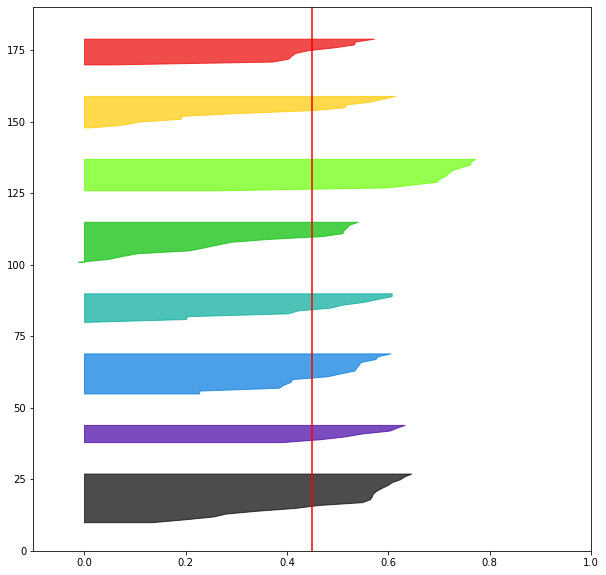

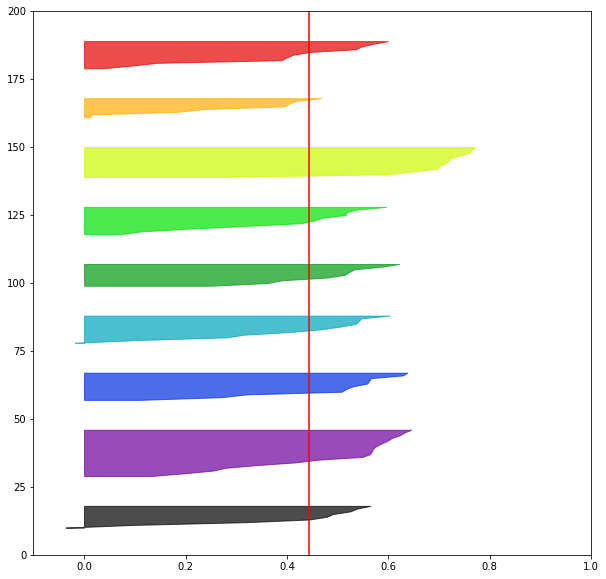

In [176]:
# Add your code for the Sillhouette graphic analysis
# You can use scikit-learn Sillhouette page as a reference

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
def plot_Silhouette(X, y, num_clusters):
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
#     fig.set_size_inches(9, 5)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(EMR3d1) + (k + 1) * 10])
    ss = silhouette_score(X, y)
    print('Avg ',ss)
    ss_per_sample = silhouette_samples(X, y)
    y_lower = 10
    for cluster in range(num_clusters):
        i_ss = ss_per_sample[y == cluster]
        i_ss.sort()
        color = cm.nipy_spectral(float(cluster) / num_clusters)
        y_upper = y_lower + len(i_ss)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, i_ss,
                          facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10
    ax1.axvline(x=ss, color="red")


max_k = int(np.sqrt(len(EMR3d1)))
ks = range(2, max_k)
for k in ks:
    km = KMeans(n_clusters=k, random_state=0)
    y = km.fit_predict(EMR3d1)
    plot_Silhouette(EMR3d1, y, k)

## Part 2: Mixture Models Clustering

### Use K-Means to create clusters according to variables of both uniform and Gaussian distributions

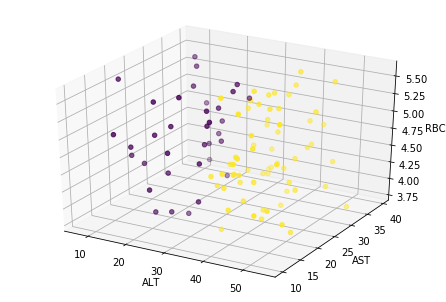

In [83]:
# Retrieve the ALT, AST and RBC column values from the dataset to cluster
variables2 = ["ALT","AST","RBC"]
EMR3d2 = sheet1.loc[:, variables2].values

# Run the K-Means algorithm, assuming the correct number of clusters is 2
y_pred_KMeans2 = KMeans(n_clusters=2, random_state=0).fit_predict(EMR3d2)
# plot_Silhouette(EMR3d2, y_pred_KMeans2, 2)
# Make a 3D chart
make_chart(EMR3d2, y_pred_KMeans2, variables2)

## Challenge 212
Scientists have found that in this population of patients, RBC distribution is uniform, ALT distribution is a Gaussian and AST distribution is a mixture of two Gaussians. Clearly, even by giving K-Means the correct K, the algorithm got to the wrong conclusion. This separation is "technically" correct, but lacks some underlying understanding of the natural phenomena. Your mission, should you choose to accept it, is to:
1. Apply the GMM algorithm on this data
2. Make any required (but reasonable) adjustments in order to find the true clusters
3. Show the final clusters in a 3D chart

<IPython.core.display.Javascript object>


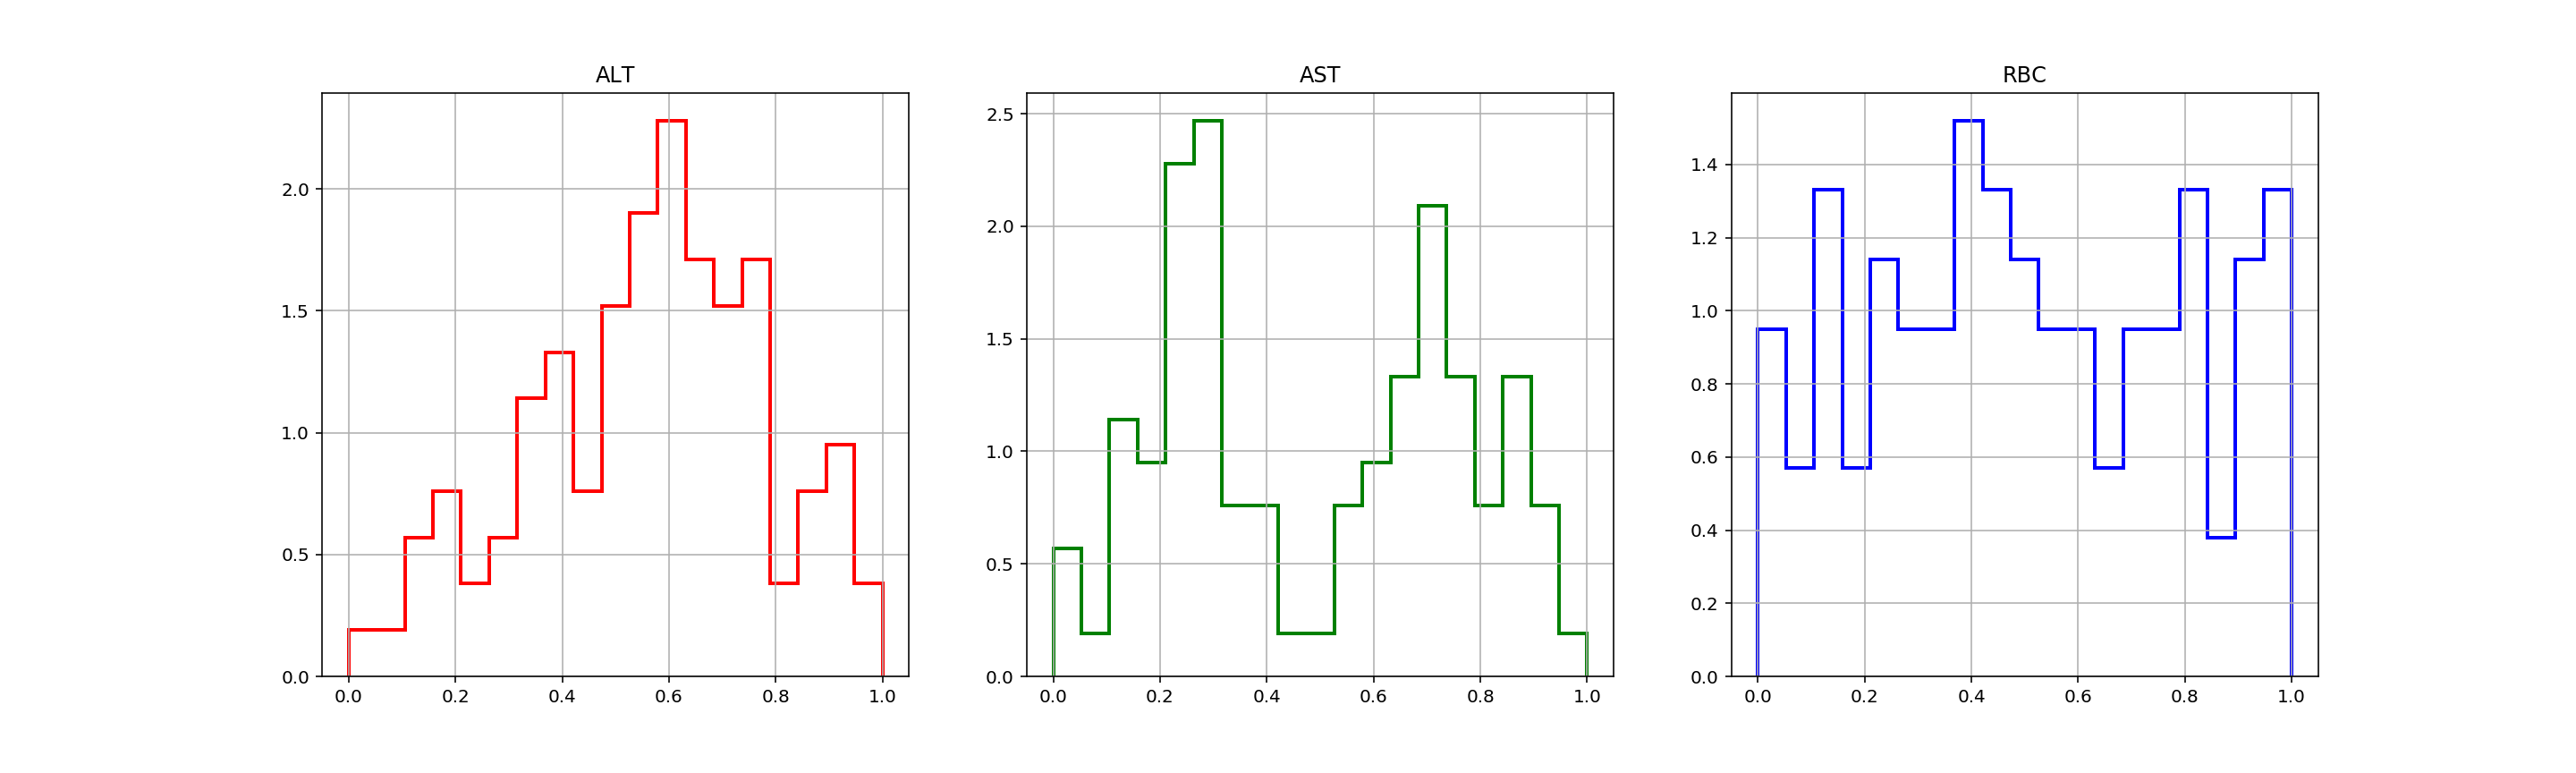

<IPython.core.display.Javascript object>


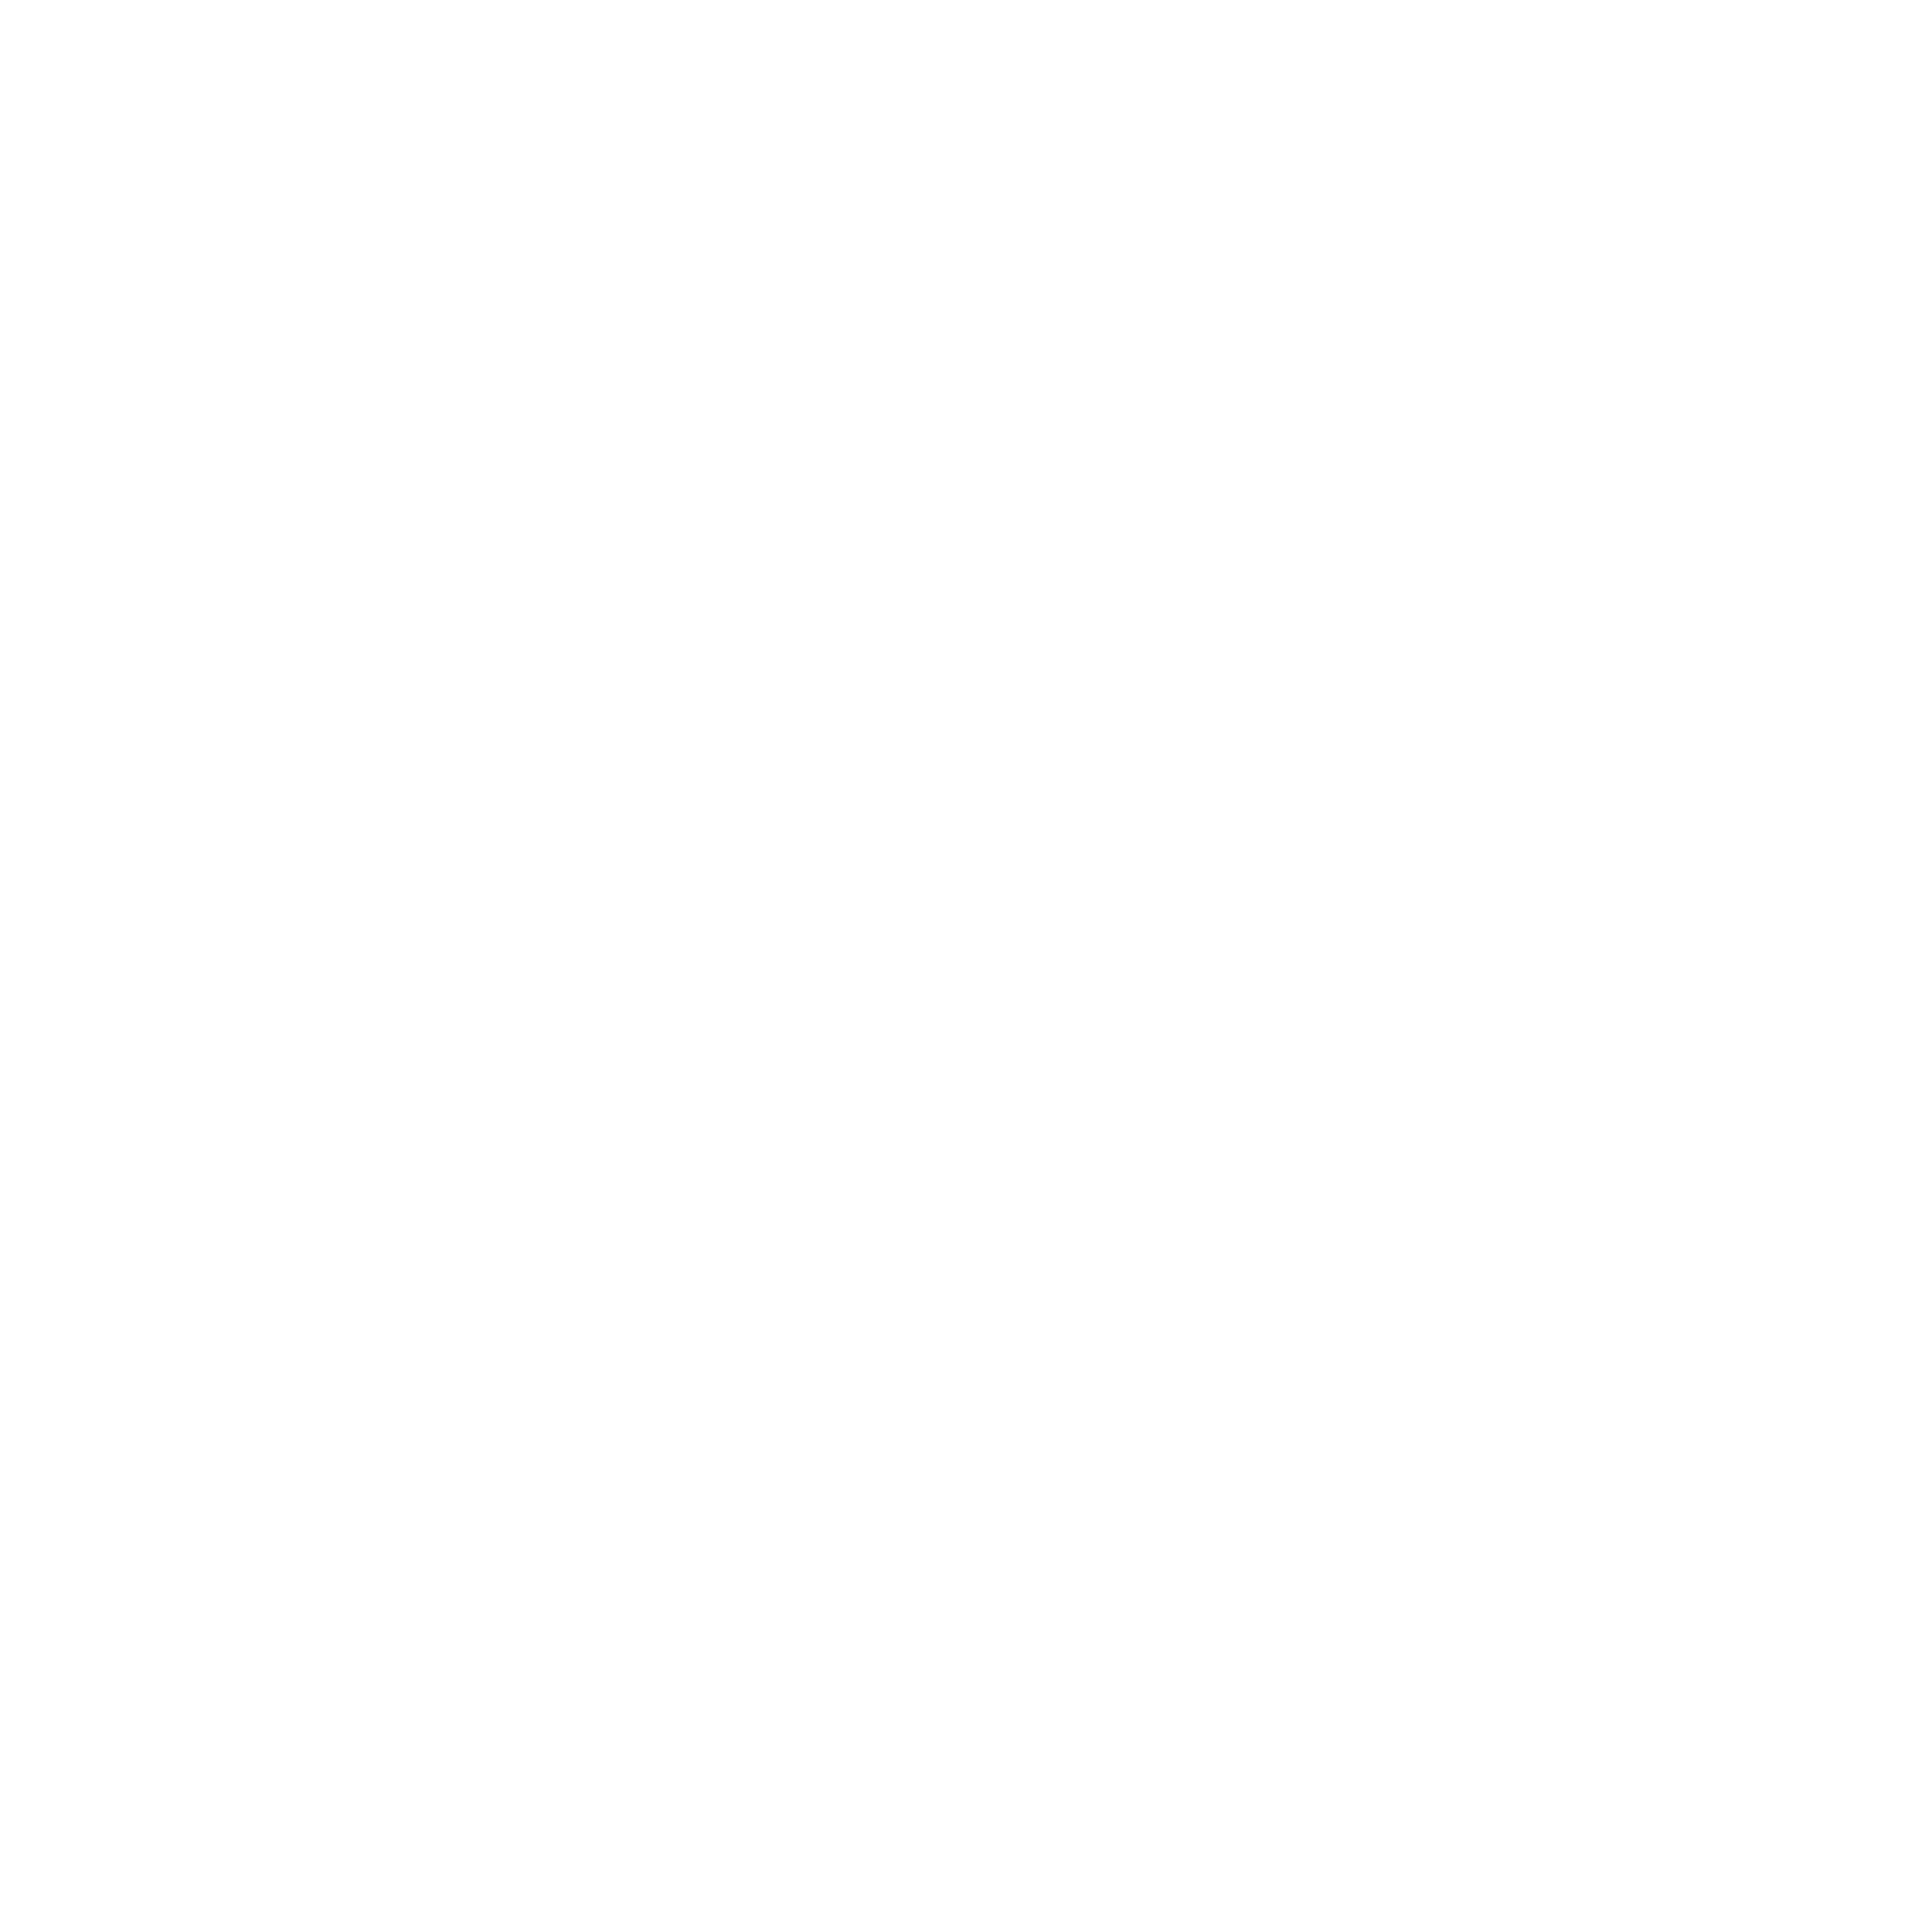

<IPython.core.display.Javascript object>


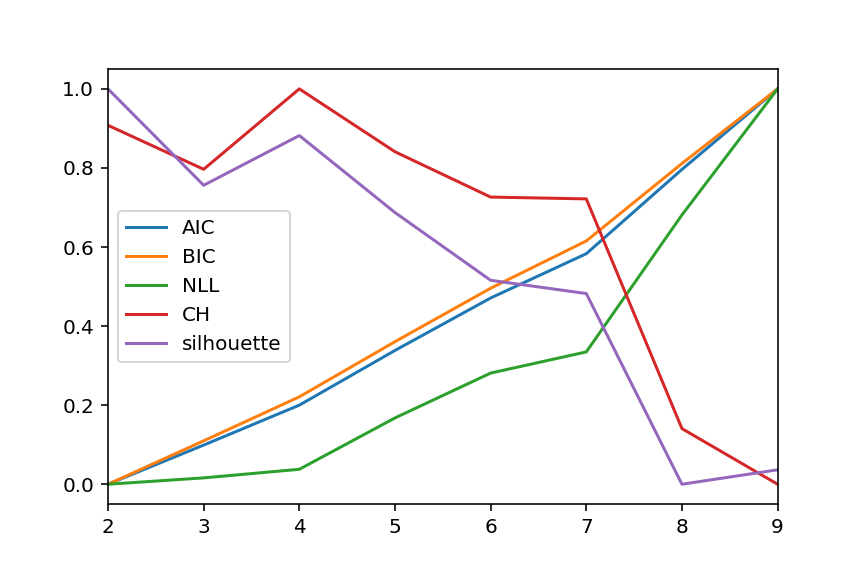

<IPython.core.display.Javascript object>


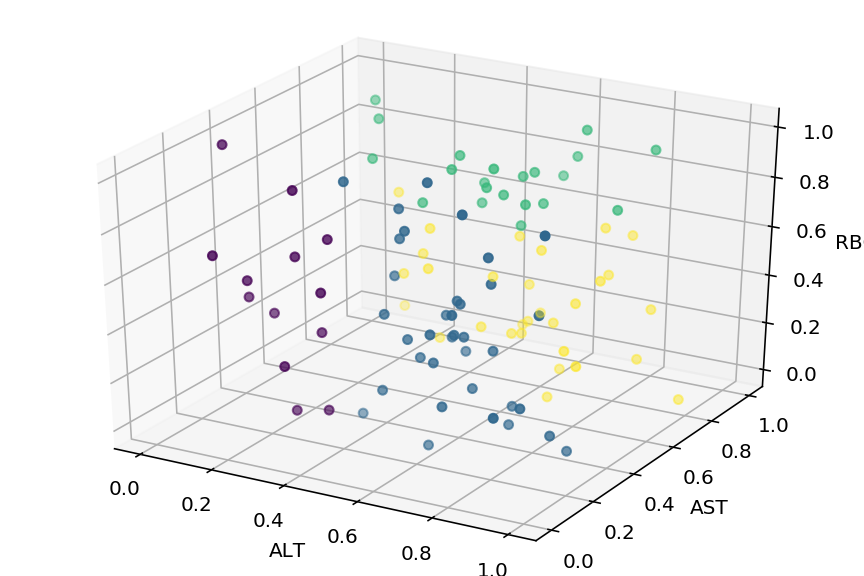

In [277]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score
import pandas as pd
# %matplotlib widget

fig = plt.figure(0, figsize = (20,6))

mm_scaler = MinMaxScaler()
# mm_scaler.fit_transform()
sheet_scaled = sheet1.copy()
sheet_scaled[variables2] = mm_scaler.fit_transform(sheet1.loc[:, variables2])
EMR3d2Scaled = sheet_scaled.loc[:, variables2].values
# rbc_scaled = mm_scaler.fit_transform(EMR3d2[:,2].reshape(-1,1))
(ax1,ax2,ax3) = fig.subplots(1, 3)
axes = (ax1,ax2,ax3)
colors = ['red','green','blue']
i = 0
for var in variables2:
    axes[i].set_title(var)
    sheet_scaled.loc[:, var].hist(ax=axes[i], bins=np.linspace(0, 1, 20),lw=2, color=colors[i], histtype='step', density=True)
    i += 1

kf = KFold(n_splits=5)
    
fig = plt.figure(1, figsize = (20,20))
n_components = np.arange(2, 10)
aics = {key:[] for key in n_components}
bics = {key:[] for key in n_components }
scores = {key:[] for key in n_components }
ch = {key:[] for key in n_components }
ss = {key:[] for key in n_components }

for train_index, test_index in kf.split(EMR3d2Scaled):
    X_train, X_test = EMR3d2Scaled[train_index], EMR3d2Scaled[test_index]

    models = [GaussianMixture(n,covariance_type='full', random_state=0).fit(X_train) for n in n_components]

    for i in n_components:
        labels = models[i -2].predict(X_test)
        aics[i] += [models[i -2].aic(X_test)]
        bics[i] += [models[i -2].bic(X_test)]
        scores[i] += [models[i -2].score(X_test)]
        ch[i] += [metrics.calinski_harabasz_score(X_test, labels)]
        ss[i] += [silhouette_score(X_test, labels)]

aics_means = list(map(lambda x: np.mean(x), aics.values()))
bics_means = list(map(lambda x: np.mean(x), bics.values()))
scores_means = list(map(lambda x: np.mean(x) * -1, scores.values()))
ch_means = list(map(lambda x: np.mean(x), ch.values()))
ss_means = list(map(lambda x: np.mean(x), ss.values()))
data = {'AIC': aics_means, 'BIC': bics_means, 'NLL': scores_means, 'CH': ch_means, 'silhouette': ss_means}
df = pd.DataFrame.from_dict(data)
df.set_index(n_components, inplace=True)
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df.plot()

# Both K=4 and K=2 are possible K values given the metrics
make_chart(EMR3d2Scaled, models[2].fit_predict(EMR3d2Scaled), variables2)








# Good Luck and Enjoy Learning Machine Learning!

